In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u
from astropy import constants as const
from scipy import interpolate
from bit_tools.mission_tools import Mission
import bit_tools as bt
import time
mpl.rc('font', family='serif', serif = "cmr10", size=18)
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams["errorbar.capsize"] = 5
mpl.rcParams['axes.unicode_minus'] = False

from mag_converter import *

/home/veome/anaconda3/lib/python3.8/site-packages/pyds9.py:94: UserWarning: Can't locate DS9 executable. Please add the DS9 directory to your PATH and try again.
  warnings.warn(ds9_warning)


In [2]:
def get_band(mission, bandpass):
    # Get a Band from bit_tools/bit_tools/data/missions/[mission]/[bandpass]/
    band = Mission(mission).get_bandpass(bandpass)
    band_response = band.r_lam
    band_pivot = band.lam_pivot * (u.nm.to(u.AA))
    x = np.arange(300, 1200, 1)
    return interpolate.interp1d(x*10, band_response(x), fill_value="extrapolate"), band_pivot

In [3]:
f814w, f814w_pivot = get_band("hst", "f814w")
sbit_shape, shape_pivot = get_band("superbit", "shape")
sbit_b, b_pivot = get_band("superbit", "b")
sbit_g, g_pivot = get_band("superbit", "g")
sbit_ha, ha_pivot = get_band("superbit", "ha")
sbit_i, i_pivot = get_band("superbit", "i")
sbit_r, r_pivot = get_band("superbit", "r")
sbit_u, u_pivot = get_band("superbit", "u")
# sbit_lum, lum_pivot = get_band("superbit19", "lum")

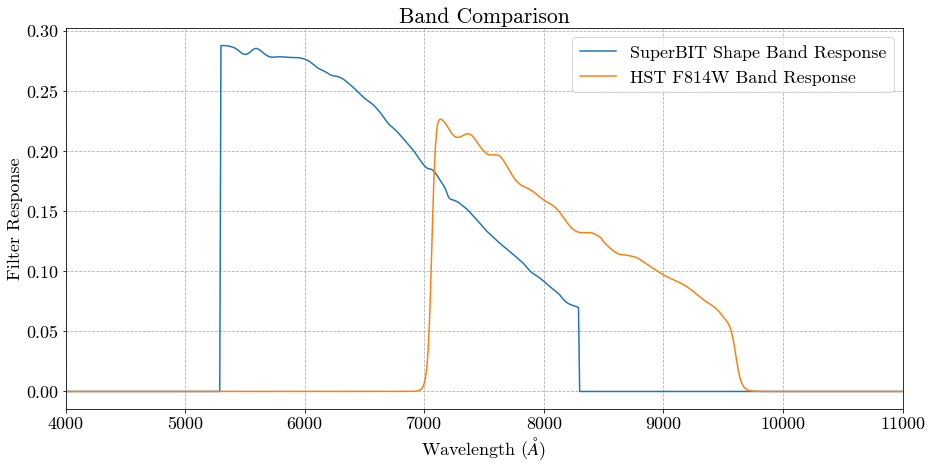

In [4]:
plt.figure(figsize=(15,7))

ls = np.arange(0, 13000, 1)
a1 = 0.6
a2 = 1


plt.plot(ls, sbit_shape(ls), label='SuperBIT Shape Band Response', alpha=a2)
plt.plot(ls, f814w(ls), label='HST F814W Band Response', alpha=a2)



plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Filter Response')
plt.title('Band Comparison')

plt.legend(loc='upper right')
plt.xlim(4000, 11000)
plt.grid(linestyle='--')
# plt.savefig("band_comparison.png")
plt.show()

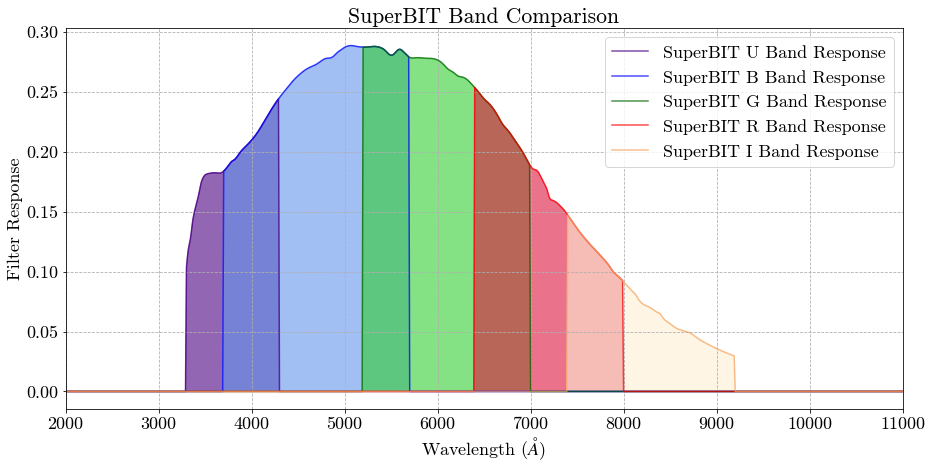

In [5]:
plt.figure(figsize=(15,7))

ls = np.arange(0, 13000, 1)
a1 = 0.6
a2 = 0.7


# plt.plot(ls, sbit_shape(ls), label='SuperBIT Shape Band Response', alpha=1, color='k')


plt.plot(ls, sbit_u(ls), label='SuperBIT U Band Response', alpha=a2, color='indigo')
plt.plot(ls, sbit_b(ls), label='SuperBIT B Band Response', alpha=a2, color='blue')
plt.plot(ls, sbit_g(ls), label='SuperBIT G Band Response', alpha=a2, color='darkgreen')
# plt.plot(ls, sbit_ha(ls), label='SuperBIT Ha Band Response', alpha=a2, color='k')
plt.plot(ls, sbit_r(ls), label='SuperBIT R Band Response', alpha=a2, color='red')
plt.plot(ls, sbit_i(ls), label='SuperBIT I Band Response', alpha=a2, color='sandybrown')


plt.fill(ls, sbit_u(ls), alpha=a1, color='indigo')
plt.fill(ls, sbit_b(ls), alpha=a1, color='cornflowerblue')
plt.fill(ls, sbit_g(ls), alpha=a1, color='limegreen')
# plt.fill(ls, sbit_ha(ls), alpha=a1, color='k')
plt.fill(ls, sbit_r(ls), alpha=a1, color='crimson')
plt.fill(ls, sbit_i(ls), alpha=a1, color='papayawhip')





plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Filter Response')
plt.title('SuperBIT Band Comparison')

plt.legend(loc='upper right')
plt.xlim(2000, 11000)
plt.grid(linestyle='--')
# plt.savefig("sbit_bands_comparison.png")
plt.show()

In [6]:
elliptical_template = np.genfromtxt('galaxy_spectra_kinney96/elliptical_template.ascii', usecols=range(2), invalid_raise=False)

starburst_all = [[], [], [], [], [], []]
for i in range(1, 7):
    starburst_all[i-1] = np.genfromtxt('galaxy_spectra_kinney96/starb%i_template.ascii' %(i), usecols=range(2), invalid_raise=False)

starburst_template = np.mean( np.array([starburst_all[0], starburst_all[1], starburst_all[2], starburst_all[3], starburst_all[4], starburst_all[5]]), axis=0 )

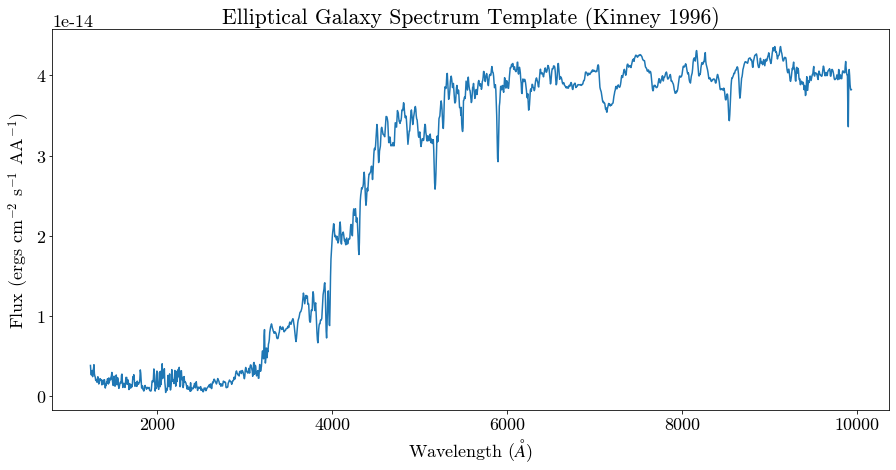

In [7]:
plt.figure(figsize=(15,7))

plt.plot(elliptical_template[:,0], elliptical_template[:,1], label='Elliptical Spectrum')

plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (ergs cm$^{-2}$ s$^{-1}$ AA$^{-1}$)')
plt.title('Elliptical Galaxy Spectrum Template (Kinney 1996)')

# plt.ylim(0, 6.6e-14)
plt.show()

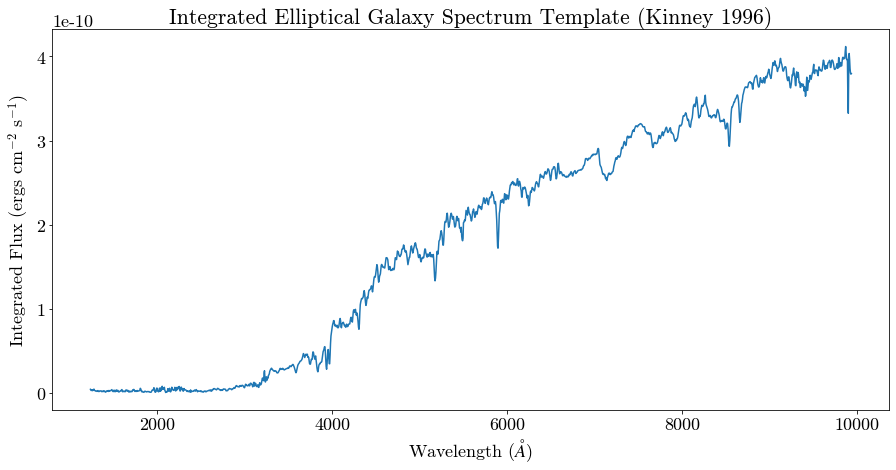

In [8]:
# Integrated Flux
plt.figure(figsize=(15,7))

plt.plot(elliptical_template[:,0], elliptical_template[:,1]* elliptical_template[:,0], label='Integrated Elliptical Spectrum')

plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Integrated Flux (ergs cm$^{-2}$ s$^{-1}$)')
plt.title('Integrated Elliptical Galaxy Spectrum Template (Kinney 1996)')

# plt.ylim(0, 6.6e-14)
plt.show()

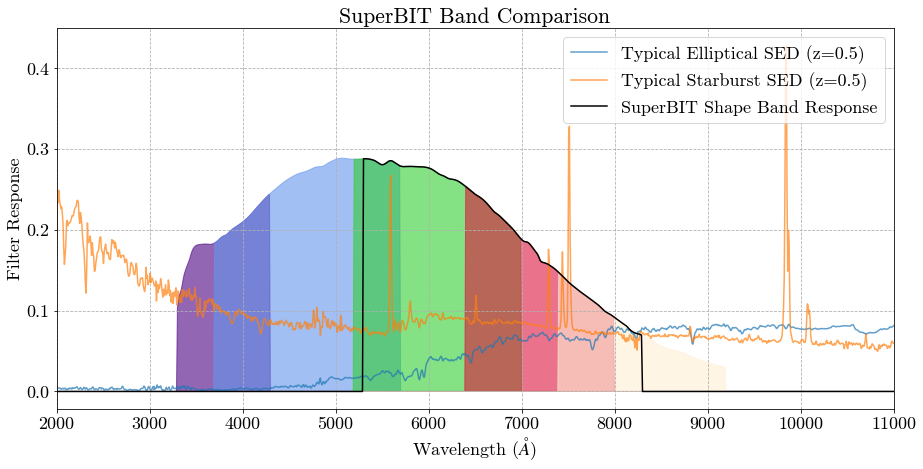

In [9]:
plt.figure(figsize=(15,7))

ls = np.arange(0, 13000, 1)
a1 = 0.6
a2 = 0.7

REDSHIFT = 0.5
e_redshifted = redshift_sed(elliptical_template, REDSHIFT)
starb_redshifted = redshift_sed(starburst_template, REDSHIFT)

scale = 3e12

plt.plot(e_redshifted[:,0], e_redshifted[:,1]*scale, label='Typical Elliptical SED (z={})'.format(REDSHIFT), alpha=a2)
plt.plot(starb_redshifted[:,0], starb_redshifted[:,1]*scale, label='Typical Starburst SED (z={})'.format(REDSHIFT), alpha=a2)

plt.plot(ls, sbit_shape(ls), label='SuperBIT Shape Band Response', alpha=1, color='k')


plt.fill(ls, sbit_u(ls), alpha=a1, color='indigo')
plt.fill(ls, sbit_b(ls), alpha=a1, color='cornflowerblue')
plt.fill(ls, sbit_g(ls), alpha=a1, color='limegreen')
plt.fill(ls, sbit_r(ls), alpha=a1, color='crimson')
plt.fill(ls, sbit_i(ls), alpha=a1, color='papayawhip')



# plt.plot(ls, f814w(ls), label='HST F814W Band Response', alpha=a2)


plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Filter Response')
plt.title('SuperBIT Band Comparison')

plt.legend(loc='upper right')
plt.xlim(2000, 11000)
plt.grid(linestyle='--')
# plt.savefig("sbit_bands_sed_comparison.png")
plt.show()

In [10]:
e_redshifted = redshift_sed(elliptical_template, 0.6)

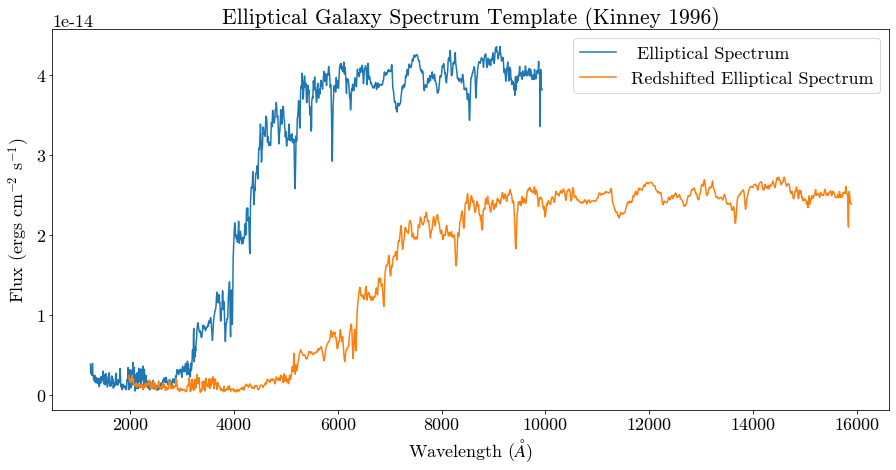

In [11]:
plt.figure(figsize=(15,7))

plt.plot(elliptical_template[:,0], elliptical_template[:,1], label=' Elliptical Spectrum')
plt.plot(e_redshifted[:,0], e_redshifted[:,1], label='Redshifted Elliptical Spectrum')

plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (ergs cm$^{-2}$ s$^{-1}$)')
plt.title('Elliptical Galaxy Spectrum Template (Kinney 1996)')
plt.legend()

# plt.ylim(0, 6.6e-14)
plt.show()

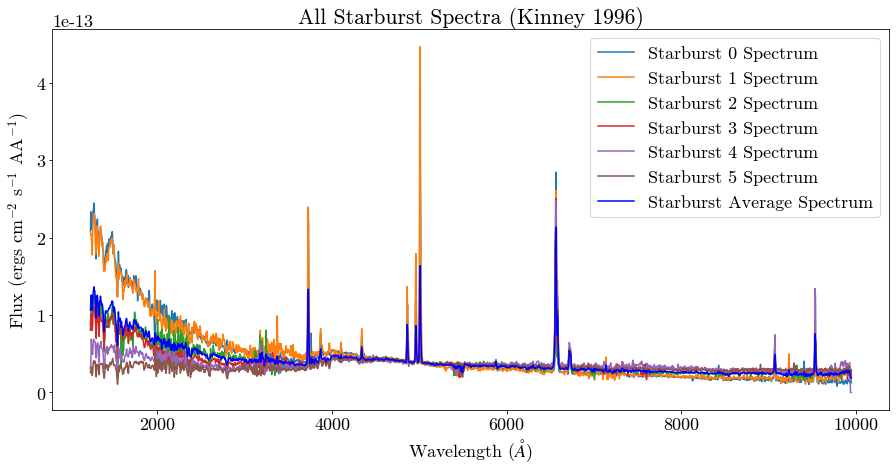

In [12]:
plt.figure(figsize=(15,7))

for i in range(6):
    plt.plot(starburst_all[i][:,0], starburst_all[i][:,1], label='Starburst %i Spectrum' %(i))

plt.plot(starburst_template[:,0], starburst_template[:,1], label='Starburst Average Spectrum', color='b')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (ergs cm$^{-2}$ s$^{-1}$ AA$^{-1}$)')
plt.legend()
plt.title('All Starburst Spectra (Kinney 1996)')

plt.show()

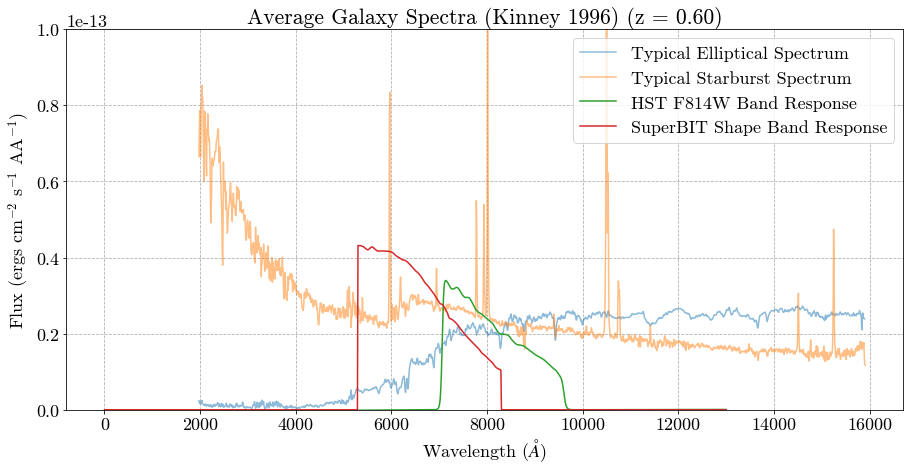

In [12]:
plt.figure(figsize=(15,7))

ls = np.arange(0, 13000, 1)
a1 = 0.5
a2 = 1.0

REDSHIFT = 0.6
e_redshifted = redshift_sed(elliptical_template, REDSHIFT)
starb_redshifted = redshift_sed(starburst_template, REDSHIFT)


plt.plot(e_redshifted[:,0], e_redshifted[:,1], label='Typical Elliptical Spectrum', alpha=a1)
plt.plot(starb_redshifted[:,0], starb_redshifted[:,1], label='Typical Starburst Spectrum', alpha=a1)

plt.plot(ls, f814w(ls)*1.5e-13, label='HST F814W Band Response', alpha=a2)
plt.plot(ls, sbit_shape(ls)*1.5e-13, label='SuperBIT Shape Band Response', alpha=a2)
# plt.plot(ls, sbit_lum(ls)*1.5e-13, label='SuperBIT19 Lum Band Response', alpha=a2)


plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (ergs cm$^{-2}$ s$^{-1}$ AA$^{-1}$)')
plt.title('Average Galaxy Spectra (Kinney 1996) (z = %.2f)' %(REDSHIFT))

plt.legend()
# plt.legend(bbox_to_anchor=(0.6, 0.6))
plt.ylim(0, 1.0e-13)
plt.grid(linestyle='--')
# plt.savefig("spectra_overview.png")
plt.show()


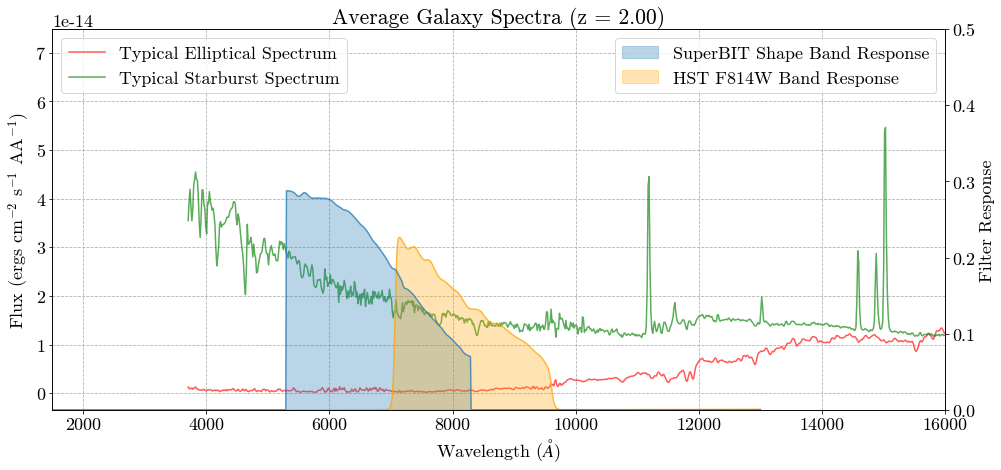

In [13]:
# create figure and axis objects with subplots()

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot()

ls = np.arange(0, 13000, 1)
a1 = 0.65
a2 = 0.3

REDSHIFT = 2
e_redshifted = redshift_sed(elliptical_template, REDSHIFT)
starb_redshifted = redshift_sed(starburst_template, REDSHIFT)

# make a plot
plt.plot(e_redshifted[:,0], e_redshifted[:,1], label='Typical Elliptical Spectrum', alpha=a1, color='red')
plt.plot(starb_redshifted[:,0], starb_redshifted[:,1], label='Typical Starburst Spectrum', alpha=a1, color='green')

# set x-axis label
ax.set_xlabel('Wavelength ($\AA$)')
# set y-axis label
ax.set_ylabel('Flux (ergs cm$^{-2}$ s$^{-1}$ AA$^{-1}$)')
plt.legend(loc='upper left')
plt.grid(linestyle='--')


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.fill(ls, sbit_shape(ls), label='SuperBIT Shape Band Response', alpha=a2, color='C0')
ax2.fill(ls, f814w(ls), label='HST F814W Band Response', alpha=a2, color='orange')

ax2.plot(ls, f814w(ls), alpha=a1, color='orange')
ax2.plot(ls, sbit_shape(ls), alpha=a1, color='C0')
# ax2.plot(ls, sbit_lum(ls), label='SuperBIT19 Lum Band Response', alpha=a2)
ax2.set_ylabel('Filter Response')
plt.legend()

ax2.set_ylim(0, 0.5)
ax2.set_xlim(1500, 16000)
plt.title('Average Galaxy Spectra (z = %.2f)' %(REDSHIFT))
# plt.savefig("spectra_overview.png")

plt.show()

https://www.astro.ljmu.ac.uk/~ikb/research/mags-fluxes/ $$ $$
https://mfouesneau.github.io/docs/pyphot/photometry.html $$ $$

For a given filter response function $R(\lambda)$ $[unitless]$ and source galaxy spectral flux density $f_\lambda (\lambda)$ $[ergs/cm^2/s/Angstrom]$, the expected spectral flux density is:
$$\langle f_\lambda \rangle = \frac{\int d\lambda \; \lambda \; R \; f_\lambda}{\int d\lambda \; \lambda \; R}$$

Then, the observed ST magnitude is
$$ m_{\text{ST}} = -2.5 \log_{10} ( \langle f_\lambda \rangle) - 21.1$$


and the observed AB magnitude is
$$ m_{\text{AB}} = -2.5 \log_{10} ( \langle f_\lambda \rangle) - -2.5 \log_{10}(\lambda_p^2/c) - 48.6$$
where $\lambda_p$ is the pivot wavelength of the filter.



## ST Mag Conversion

Given a source ST Magnitude, we can recover
$$\langle f_\lambda \rangle =  10^{-(m+21.1)/2.5}$$

Then, for a given filter, we can use the relation
$$\langle f_\lambda \rangle = \frac{\int d\lambda \; \lambda \; R \; f_\lambda}{\int d\lambda \; \lambda \; R }$$

Thus, if we need to correct the flux density by a factor $\gamma$, we can simply scale the spectrum $f_\lambda$ by $\gamma$, such that
$$\gamma \; \langle f_\lambda \rangle = \frac{\int d\lambda \; \lambda \; R \; \gamma \; f_\lambda}{\int d\lambda \; \lambda \; R}$$

The correction to the spectral flux density is given by:
$$ \gamma = 10^{\frac{m_{\text{exp}}}{2.5} - \frac{m_{\text{obs}}}{2.5}}.$$

In [13]:
# Test calculation with units
e_wavelength = elliptical_template[:,0]  * u.AA # Angstrom
e_flux = elliptical_template[:,1] * u.erg / (u.AA * u.s * u.cm**2) # erg s^-1 cm^-2 Angstrom^-1
r = f814w(e_wavelength) # unitless

non0_indices = np.nonzero(e_flux)

r = r[non0_indices]
lam = e_wavelength[non0_indices]
f_lam = e_flux[non0_indices]
 
f1 = np.trapz(y=f_lam * r * lam, x=lam)
f2 = np.trapz(y=r * lam, x=lam) 

f_exp = f1/f2 # erg s^-1 cm^-2 AA^-1
print("f_lambda = %s" %f_exp)

mag = -2.5 * np.log10(f_exp.value) - 21.1
print("ST Magnitude = %.2f" %mag)

f_lambda = 4.001923725625957e-14 erg / (Angstrom cm2 s)
ST Magnitude = 12.39


In [20]:
# Test the mag conversion
mag_obs = 24.5
z = 1.5

start = time.time()

super_e_mag, super_starb_mag = stmag_conversion(mag_obs, z, f814w, sbit_shape, elliptical_template, starburst_template)
# hst_e_mag, hst_starb_mag

end = time.time()
print(end - start)

print("Original HST ST Mag: %.2f" %mag_obs)
# print("")
# print("HST Refitted Elliptical ST Mag: %.2f" %hst_e_mag)
# print("HST Refitted Starburst ST Mag: %.2f" %hst_starb_mag)
# print("")
print("SuperBIT Elliptical ST Mag: %.2f" %super_e_mag)
print("SuperBIT Starburst ST Mag: %.2f" %super_starb_mag)


0.002306222915649414
Original HST ST Mag: 24.50
SuperBIT Elliptical ST Mag: 25.62
SuperBIT Starburst ST Mag: 24.32


## AB Mag Conversion

https://www.astro.ljmu.ac.uk/~ikb/research/mags-fluxes/ $$ $$
https://mfouesneau.github.io/docs/pyphot/photometry.html $$ $$

For a given filter response function $R(\lambda)$ $[unitless]$ and source galaxy spectral flux density $f_\lambda (\lambda)$ $[ergs/cm^2/s/Angstrom]$, the expected spectral flux density is:
$$\langle f_\lambda \rangle = \frac{\int d\lambda \; \lambda \; R \; f_\lambda}{\int d\lambda \; \lambda \; R}$$

Then, the observed AB magnitude is
$$ m_{\text{AB}} = -2.5 \log_{10} ( \langle f_\lambda \rangle) - -2.5 \log_{10}(\lambda_p^2/c) - 48.6$$
where $\lambda_p$ is the pivot wavelength of the filter.



Given a source AB Magnitude, we can obtain the expected spectral flux density must have been
$$\langle f_\lambda \rangle = \frac{c}{\lambda^2_{p, obs}} 10^{-(m_{obs}+48.6)/2.5}$$

Then, for a given target filter, we can use the relation
$$\langle f_\lambda \rangle = \frac{\int d\lambda \; \lambda \; R \; f_\lambda}{\int d\lambda \; \lambda \; R }$$

Thus, if we need to correct the expected flux density by a factor $\gamma$, we can simply scale the entire spectrum $f_\lambda$ by $\gamma$, such that
$$\frac{\int d\lambda \; \lambda \; R \; \gamma \; f_\lambda}{\int d\lambda \; \lambda \; R} = \gamma \; \langle f_\lambda \rangle $$

The correction to the spectral flux density is given by:
$$ \gamma = 10^{\frac{m_{\text{exp}}}{2.5} - \frac{m_{\text{obs}}}{2.5}}.$$

In [37]:
# Test calculation with units
e_wavelength = elliptical_template[:,0]  * u.AA # Angstrom
e_flux = elliptical_template[:,1] * u.erg / (u.AA * u.s * u.cm**2) # erg s^-1 cm^-2 Angstrom^-1
r = f814w(e_wavelength) # unitless

non0_indices = np.nonzero(e_flux)

r = r[non0_indices]
lam = e_wavelength[non0_indices]
f_lam = e_flux[non0_indices]
 
f1 = np.trapz(y=f_lam * r * lam, x=lam)
f2 = np.trapz(y=r * lam, x=lam) 

f_exp = f1/f2 # erg s^-1 cm^-2 AA^-1
print("f_lambda = %s" %f_exp)

stmag = (-2.5 * np.log10(f_exp.value))- 21.1
abmag = bt.converters.magst_to_magab(stmag, shape_pivot * u.AA.to(u.nm))
print("AB Magnitude = %.2f" %mag)

f_lambda = 4.0273498449172776e-14 erg / (Angstrom cm2 s)
AB Magnitude = -13.45


In [21]:
# Test the AB mag conversion
mag_obs = 24.5
z = 1.5

start = time.time()

super_e_mag, super_starb_mag = abmag_conversion(mag_obs, z, f814w, sbit_shape, elliptical_template, starburst_template, src_pivot=f814w_pivot, target_pivot=shape_pivot)
# hst_e_mag, hst_starb_mag

end = time.time()
print(end - start)


print("Original HST AB Mag: %.2f" %mag_obs)
# print("")
# print("HST Refitted Elliptical Mag: %.2f" %hst_e_mag)
# print("HST Refitted Starburst Mag: %.2f" %hst_starb_mag)
# print("")
print("SuperBIT Elliptical AB Mag: %.2f" %super_e_mag)
print("SuperBIT Starburst AB Mag: %.2f" %super_starb_mag)

0.021209239959716797
Original HST AB Mag: 24.50
SuperBIT Elliptical AB Mag: 26.10
SuperBIT Starburst AB Mag: 24.80


### Confirm that this result is the same as converting everything to ST, performing the conversion there, and then converting back to AB (works!):

In [22]:
# Test the alternate AB mag conversion
mag_obs = 24.5
z = 1.5

start = time.time()

st_mag_obs = bt.converters.magab_to_magst(mag_obs, f814w_pivot * u.AA.to(u.nm))
super_e_mag, super_starb_mag = stmag_conversion(st_mag_obs, z, f814w, sbit_shape, elliptical_template, starburst_template)
super_e_mag = bt.converters.magst_to_magab(super_e_mag, shape_pivot * u.AA.to(u.nm))
super_starb_mag = bt.converters.magst_to_magab(super_starb_mag, shape_pivot * u.AA.to(u.nm))

end = time.time()
print(end - start)

print("Original HST AB Mag: %.2f" %mag_obs)
# print("")
print("SuperBIT Elliptical AB Mag: %.2f" %super_e_mag)
print("SuperBIT Starburst AB Mag: %.2f" %super_starb_mag)

0.006256818771362305
Original HST AB Mag: 24.50
SuperBIT Elliptical AB Mag: 26.10
SuperBIT Starburst AB Mag: 24.80
